## Fitting Curvature

### Overview
- In regression analysis, curve fitting is the process of specifying the model that provides the best fit to the specific curves in the dataset.
- Curved relationships between variables are not as straightforward to fit and interpret as linear relationships.
- In a curved relationship, the change in the dependent variable associated with a one-unit shift in the independent variable varies based on where you start on the regression line.
- In other words, the effect of the independent variable is not a constant value.

### Graph Curvature with Main Effects Plots
- We can graph a curved relationship on a fitted line plot and visualize the changes when there is only one variable.
- However when there are two or more variables(real-world), we cannot graph the data to visualize the curvature. To do this we use **Main effects Plots**.
- The main effects plots can also be used with linear relationships, but is more useful in understanding curvilinear relationships.
- A main effects plot can graph isolated main effects on a two dimensional plot even when the model has more than one independent variable.
- Below is the code for defining the model and graphing main effects using the model. 

In [2]:
# import libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data set
hardness_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/Hardness.csv")

# view the data 
hardness_df.head()

,Pressure,Hardness,Temp
0,9.5,14.814,70.610561
1,8.4,17.502,73.348930
2,9.8,14.007,66.153767
3,11.0,19.443,70.057809
4,8.3,7.573,69.339188


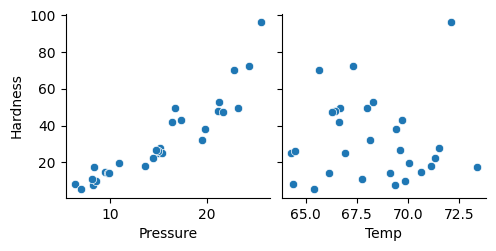

In [4]:
# Plot the data for each variable and see the changes
# Creating a pairplot to visualize all variables
sns.pairplot(
    hardness_df,
    x_vars = ["Pressure", "Temp"],
    y_vars=["Hardness"]
)

# For more details on pairplots
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

In [5]:
# For comparison as to which fit is the best (line or curve), we will fit the data using both linear formula and quadratic formula
# 1. Fit the model using linear formula and check the statistics
linear_model = ols("Hardness ~ Temp + Pressure", data=hardness_df).fit()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Hardness   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     73.57
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.97e-11
Time:                        08:28:00   Log-Likelihood:                -102.92
No. Observations:                  29   AIC:                             211.8
Df Residuals:                      26   BIC:                             215.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.2719     47.709     -1.389      0.177    -164.339      31.796
Temp           0.6503      0.690      0.942      0.355      -0.768       2.069
Pressure       3.5632      0.294     12.130      0.000       2.959       4.167
==============================================================================
Omnibus:                        4.194   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.611
Skew:                           0.655   Prob(JB):                        0.271
Kurtosis:                       3.666   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Fitting the model using quadratic formula
quad_model = ols("Hardness ~ Temp + Pressure + np.power(Pressure, 2)", data=hardness_df).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Hardness   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.55
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.54e-12
Time:                        08:28:00   Log-Likelihood:                -97.281
No. Observations:                  29   AIC:                             202.6
Df Residuals:                      25   BIC:                             208.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -38.8274     40.837     -0.951      0.351    -122.934      45.279
Temp                      0.7594      0.580      1.309      0.202      -0.435       1.954
Pressure                 -1.5972      1.517     -1.053      0.302      -4.721       1.527
np.power(Pressure, 2)     0.1657      0.048      3.448      0.002       0.067       0.265
==============================================================================
Omnibus:                        1.718   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                0.700
Skew:                           0.309   Prob(JB):                        0.705
Kurtosis:                       3.445   Cond. No.                     9.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regression Equation**
- The Regression equation for the quadratic regression model will be
$$ Hardness = -38.8 + 0.759 Temp - 1.6 Pressure + 0.1657 Pressure * Pressure $$

In [7]:
# Try making a plot using the model equation with matplotlib

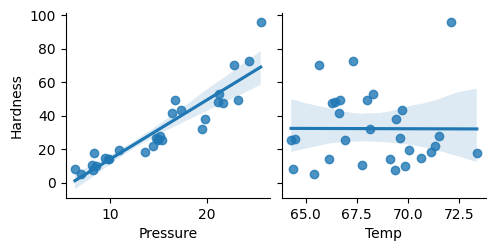

In [8]:
# Main effects plot for the linear model.
sns.pairplot(hardness_df, 
             x_vars = ["Pressure", "Temp"],
             y_vars=["Hardness"],
             kind="reg")

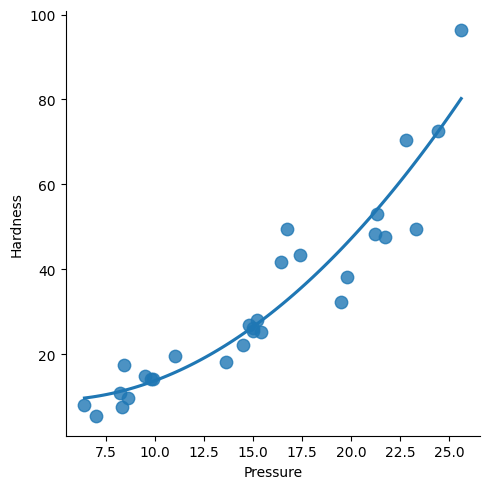

In [9]:
# Plotting regression line for quadratic model
sns.lmplot(hardness_df,x="Pressure",
           y="Hardness", 
           order=2,
           ci=None, # confidence interval
           scatter_kws={"s": 80})

# sns.lmplot(hardness_df,x="Temp", 
#            y="Hardness", 
#            order=2,
#            ci=None, # confidence interval
#            scatter_kws={"s": 80})

### Interpretation of results
- In this example we are using temperature and pressure in a manufacturing process to predict the hardness of a product. 
- Temperature is a linear term and according to the regression equation:
    - for one degree increase in temperature, the stiffness increases by 0.759 units of hardness.
    - Pressure also related to hardness, but it includes a polynomial term in the equation.
    - The equation has a squared term, which means that hardness has a U or and inverted U shaped relationship with pressure.
    - The positive coefficient indicates that it is U shaped.
    - To plot the fitted line for two or more variables we use a **main effects plot**.
    - A main effects plot shows the effects of each independent variable on the dependent variable while keeping others constant.
- From the above plot we can see the **curvilinear** nature of the relationship between density and stiffness or(Pressure and  Hardness)
- When there is no relationship between two variables, the plot displays horizontal lines that represents the coefficients with values of zero.
- However, random sampling error can produce apparent relationships in these graphs, when two variables are not related.
- So, while we can use main effects plots to display relationships between two variables, but to verify if they are statistically significant, we will use p-values.

### Need to fit curves in a Regression Model
- When we have one independent variable, using a fitted line plot both to see curvature and to determine  whether the model fits the curvature is easy.
- With multiple regression, we can use main effects plots to display how the model fits the curvature.
- However these plots don't indicate how *well* the model fits the curvature.
- For multiple regression residual plots are a crucial indicator of whether your model adequately fits curved relationships.
- If you see a pattern in the residual plots, your model doesn't provide adequate fit for the data.

**Tip**
- When you start working with your dataset, the best way to determine whether the relationship between variables are curved is to graph them in a scatterplot.
- The curve that the plot displays often helps determine how to model it.

### Difference b/w Linear and Non Linear Models
- Non Linear Regression is a type of analysis that can fit more types of curves as there are limitations on the type of curves that Linear regression.
- To differentiate the two, we will first see, what is a Linear Regression Equation. Everything else is then non-linear.

#### Linear Regression Equations
- A linear regression model follows a very particular form. 
- In Statistics a model is linear when all terms in the model are one of the following :
    - The constant
    - A parameter multiplied by an independent variable(IV).
- Then we can build the equation by only adding the terms together.
- These rules limit the form to just one type
$$  
    Dependent Variable = constant + parameter * IV + ... + parameter * IV
$$ 
            OR
$$
    y = \beta_0 + \beta_1 X_1 + ... + \beta_k X_k 
$$

- This type of regression equation is linear in the parameters. 
- It is also possible to model curvature with this type of model. While the function must me linear in parameters, we can raise an independent variable by an exponent to fit a curve.
- For ex - if you square an independent variable, the model can follow a U-shaped curve, as in the above example (squared the pressure variable to fit the U-shaped curve). The equation will be
$$
    y = \beta_0 + \beta_1 X_1 + \beta_2 X_2^2
$$
- While the independent variable is squared, the model is still linear in the parameters. 
- Linear models can also contain log terms and inverse terms to follow different kinds of curves and yet continue to be linear in the parameters.

#### Non Linear Regression Equations
- If a regression equation doesn't follow the rules for a linear model, then it must be a non linear model.
- This added flexibility opens the door to a huge number of possible forms. Consequently non-linear regression can fit a variety of curves.
- You may need to conduct some research ad to which  functional form provides the best fit for your data.
- Below are some examples of Non linear regression equations: (can't bring the plots here, google them if required)
    1. Power - $\theta_1 * X^\theta 2 $
    2. Weibull growth - $ \theta + (\theta_2 - \theta_1) * \exp(-\theta_3 * X^\theta 4)$
    3. Fourier - $ \theta_1 * \cos(X + \theta_4) + \theta_2 * \cos(2 * X + \theta_4) + \theta_3 $
        
- The defining characteristic for both types of models is the functional form. 

### The best way to Model Curvature
- To determine which method best fits the curve, we will use a combination of graphs and goodness of fit statistics.
- The two goodness-of-fit statistics that will be used in this example are - R-squared and Standard error of Regression (S).
- Higher R-squared and lower S values are often better.

#### Curve Fitting using Polynomial terms in Linear Regression
- The most common method to fit a curvilinear relationship is to include polynomial terms in a linear model.
- If you are unsure where to start, polynomials are a great place.
- Polynomial terms are independent variables, that you raise to a power, such as squared or cubed terms.
- To determine the correct polynomial term to include:
    - First count the number of bends in the line.
    - Then take the number of bends in the curve and add one for the order.
    - For ex - quadratic terms model one bend while cubic terms model 2.
- In practice cubic terms are very rare, and most of the terms are usually quadratic.

**Tip**
- If you include a polynomial term in the model, you should center the continuous independent variables to reduce multicolinearity that it produces.

#### Example for fitting different curves
- Below is the example to show how to fit different curves and analyze which is a better fit using goodness-of-fit statistics

In [10]:
# load the dataset
curve_fitting_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/CurveFittingExample.csv")
curve_fitting_df.head()

,Input,Output,InvInput
0,1,6.0,1.000000
1,2,9.5,0.500000
2,3,13.0,0.333333
3,4,15.0,0.250000
4,5,16.5,0.200000


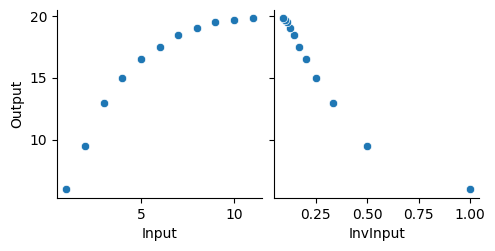

In [11]:
# Visualizing the data -  all variables
sns.pairplot(curve_fitting_df,
             x_vars=["Input", "InvInput"],
             y_vars=["Output"])

In [12]:
# fit the model - only for "Input" variable 
curve_fitting_quad_model =  ols("Output ~ Input + np.power(Input, 2)", data=curve_fitting_df).fit()
curve_fitting_quad_model.summary()

c:\Users\heena\Desktop\Learning_ML\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     386.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.10e-08
Time:                        08:28:01   Log-Likelihood:                -6.6295
No. Observations:                  11   AIC:                             19.26
Df Residuals:                       8   BIC:                             20.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.2412      0.569      5.693      0.000       1.928       4.554
Input                  3.5643      0.218     16.346      0.000       3.061       4.067
np.power(Input, 2)    -0.1915      0.018    -10.820      0.000      -0.232      -0.151
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.888
Skew:                           0.419   Prob(JB):                        0.642
Kurtosis:                       1.888   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Standard Error of Regression (Root mean squared Error of residuals)
np.sqrt(curve_fitting_quad_model.mse_resid)

# Further Reading
# https://statisticsbyjim.com/regression/root-mean-square-error-rmse/
# https://statisticsbyjim.com/regression/standard-error-regression-vs-r-squared/
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html

0.5183868649232367

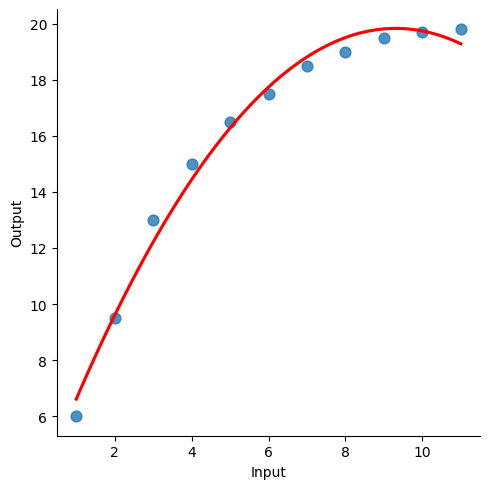

In [14]:
# fitted line plot with quadratic term
sns.lmplot(curve_fitting_df,
           x="Input",
           y="Output", 
           order=2,
           ci=None, # confidence interval
           scatter_kws={"s": 60},
           line_kws={'color': 'red'})

#### Interpretation of the Curve fitting Example
- The R-squared value in the above example is 99%, but as we see from the plot above, the regression line doesn't quite fit correctly.
- The fitted line systematically over and under-predicts the data at different points along the curve.
- High R-squared values don't always represent good models and we need to check residual plots to get a better idea of model fit.

#### Curve Fitting using Reciprocal Terms in Linear Regression
- When a dependent variable descends to a floor or ascends to a ceiling (i.e. approaches an asymptote), we can try using a reciprocal of an independent variable (1/X).
- We use a reciprocal term when the effect of an independent variable decreases as its value increases.
- To use this method, you need to create a new column in the dataset and use it in the analysis.
- $\frac{\beta * 1}{X}$ - The value of this term decreases as the independent variable (X) increases because it is in the denominator.
- In other words, a X increases, the effect of this term decreases and the slope flattens.
- X cannot equal zero for this type of model because you cannot divide by zero.

**Further Reading**
- For more details on asymptotes 
    - https://www.geeksforgeeks.org/asymptote-formula/
    - https://www.cuemath.com/calculus/asymptotes/

In [15]:
# Fitting a model with linear reciprocal term
linear_reciprocal_model = ols("Output ~ InvInput", data=curve_fitting_df).fit()
linear_reciprocal_model.summary()

c:\Users\heena\Desktop\Learning_ML\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     84.77
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.09e-06
Time:                        08:28:02   Log-Likelihood:                -18.939
No. Observations:                  11   AIC:                             41.88
Df Residuals:                       9   BIC:                             42.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2487      0.660     30.695      0.000      18.756      21.741
InvInput     -16.1384      1.753     -9.207      0.000     -20.104     -12.173
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.970
Skew:                          -0.620   Prob(JB):                        0.616
Kurtosis:                       2.240   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# R squared
print(f"R squared - {linear_reciprocal_model.rsquared}")
print(f"R squared adj - {linear_reciprocal_model.rsquared_adj}")
print(f"Standard error of Regression (RMSE) - {np.sqrt(linear_reciprocal_model.mse_resid)}")

R squared - 0.9040214867801841
R squared adj - 0.8933572075335379
Standard error of Regression (RMSE) - 1.496553757197975


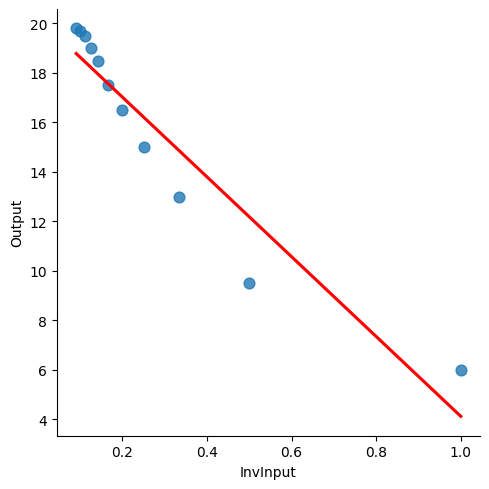

In [17]:
# Fitted line plot for linear reciprocal term
sns.lmplot(curve_fitting_df,
           x="InvInput",
           y="Output", 
           order=1,
           ci=None, # confidence interval
           scatter_kws={"s": 60},
           line_kws={'color': 'red'})

In [18]:
# Fitted model for quadratic reciprocal term
quad_reciprocal_model = ols("Output ~ InvInput + np.power(InvInput, 2)", data=curve_fitting_df).fit()
quad_reciprocal_model.summary()

c:\Users\heena\Desktop\Learning_ML\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5772.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.30e-13
Time:                        08:28:02   Log-Likelihood:                 8.1845
No. Observations:                  11   AIC:                            -10.37
Df Residuals:                       8   BIC:                            -9.175
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                23.3164      0.110    212.135      0.000      23.063      23.570
InvInput                -37.9667      0.677    -56.115      0.000     -39.527     -36.406
np.power(InvInput, 2)    20.6504      0.622     33.179      0.000      19.215      22.086
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.168
Skew:                          -0.243   Prob(JB):                        0.920
Kurtosis:                       2.640   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# R squared
print(f"R squared - {quad_reciprocal_model.rsquared}")
print(f"R squared adj - {quad_reciprocal_model.rsquared_adj}")
print(f"Standard error of Regression (RMSE) - {np.sqrt(quad_reciprocal_model.mse_resid)}")

R squared - 0.9993075347858517
R squared adj - 0.9991344184823145
Standard error of Regression (RMSE) - 0.13482814349205102


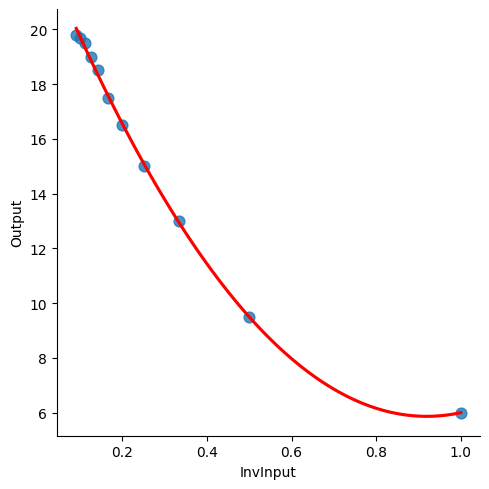

In [20]:
# Fitted line plot for quadratic reciprocal term
sns.lmplot(curve_fitting_df,
           x="InvInput",
           y="Output", 
           order=2,
           ci=None, # confidence interval
           scatter_kws={"s": 60},
           line_kws={'color': 'red'})

**Fitted Plots**:  
- On the fitted line plots, the quadratic reciprocal model has a higher R-squared value (good) and a lower S-value (good) than the quadratic model.
- It also doesn't display biased fitted values. This model provides the best fit to the data.

#### Curve Fitting with Log Functions in Linear Regression
- A log transformation allows linear models to fit curves that are otherwise possible only with nonlinear regression.
- For ex we can express the non linear function $Y = e^B0 X_1^B1 X_2^B2$ in the linear form as:
$$
Ln Y = B_0 + B_1lnX_1 + B_2lnX_2
$$
- A model can take logs on both sides on the equation, which is the double log form as in the equation above, or it can use a semi-log form, which is where you take the log of only one side.
-If you take logs on the independent variable side of the model, it can be for all or a subset of the variables.
- Using log transformations is a powerful method to fit curves. Choosing between a double-log or semi-log model depends on your data and subject area.
- A semi-log model can fit curves that flatten as the independent variable increases.

In [21]:
# Fitting the model for semi-log linear regression
log_model = ols("Output ~ np.log10(Input)", data=curve_fitting_df).fit()
log_model.summary()

c:\Users\heena\Desktop\Learning_ML\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     648.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.07e-09
Time:                        08:28:02   Log-Likelihood:                -8.2301
No. Observations:                  11   AIC:                             20.46
Df Residuals:                       9   BIC:                             21.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.0993      0.418     14.590      0.000       5.154       7.045
np.log10(Input)    14.0646      0.552     25.460      0.000      12.815      15.314
==============================================================================
Omnibus:                        1.706   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.234
Skew:                          -0.689   Prob(JB):                        0.539
Kurtosis:                       2.110   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print("Linear Regression using log model")
print(f"R-squared {log_model.rsquared}")
print(f"R squared adj - {log_model.rsquared_adj}")
print(f"Standard error of Regression (RMSE) - {np.sqrt(log_model.mse_resid)}")


Linear Regression using log model
R-squared 0.9863058261134009
R squared adj - 0.9847842512371121
Standard error of Regression (RMSE) - 0.5652925105806911


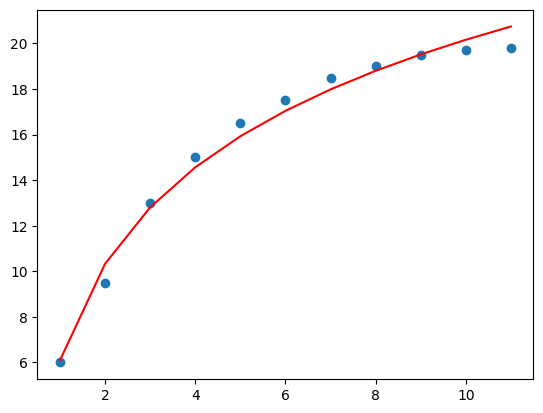

In [23]:
# Fitted line plot for semi-log linear regression
m = log_model.params["np.log10(Input)"]
c = log_model.params["Intercept"]
plt.scatter(x=curve_fitting_df["Input"], y=curve_fitting_df["Output"])
plt.plot(curve_fitting_df["Input"], m * np.log10(curve_fitting_df["Input"]) + c, color="red")

**Curve Fitting For Log Model**
- Like the first quadratic model, the semi-log model also provides a biased fit to the data points.
- Additionally, the S and R-squared values are also similar to the quadratic model.
- The model with the quadratic reciprocal term, continues to provide the best fit.

#### Curve Fitting with Nonlinear Regression
- While both Linear and Non Linear Regression models can fit curves, non linear regression is much more flexible in the shapes of curves that it can fit.
- The general guideline is to use linear regression first to determine whether it can fit a particular type of curve in your data. If you can't obtain an adequate fit using one of the methods in linear regression, that's when you might need to choose non linear regression.
- Nonlinear Regression can fit many more types of curves, but it can require more effort to find the best fit and to interpret the role of the independent variables.
- Additionally, R-squared is not valid for nonlinear regression, and it is impossible to calculate p-values for the parameter estimates.
- However, the standard error of regression (S) is valid for both linear and nonlinear regression and can be a great way to compare fits between these models.
- A small standard error of regression indicates, that the data points are closer to the fitted values.

#### Comparing the Curve-Fitting Effectiveness of Different Models

|Model                 | R-squared | S (RMSE) | Unbiased |
|----------------------|-----------|----------|----------|
| Reciprocal Quadratic | 99.9      | 0.138428 | Yes      |
| Quadratic            | 99.0      | 0.518387 | No       |
| Semi-log             | 98.6      | 0.565293 | No       |
| Reciprocal Linear    | 90.4      | 1.49655  | No       |
| Linear               | 84.0      | 1.93253  | No       |


### Another Curve Fitting Example
- Below is another example for fitting a curve using linear regression.
- The goal is to develop an unbiased model
- The data shows the relationship between density and electron mobility.
- Here we will predict the mobility of electrons based on density, so Mobility is a dependent variable and density is an independent variable.

In [25]:
# load the data
electron_mobility_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/ElectronMobility.csv")
electron_mobility_df.head()

,Mobility,Density Ln
0,80.574,-3.067
1,84.248,-2.981
2,87.264,-2.921
3,87.195,-2.912
4,89.076,-2.840


Text(0, 0.5, 'Mobility')

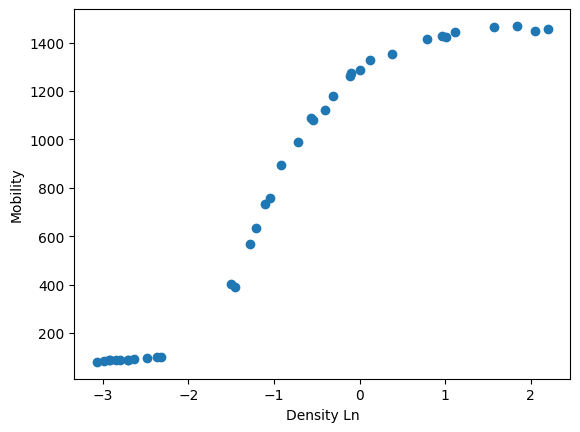

In [27]:
# scatter plot for visualizing the data 
plt.scatter(x=electron_mobility_df["Density Ln"], 
            y=electron_mobility_df["Mobility"])
plt.xlabel("Density Ln")
plt.ylabel("Mobility")

**Fitting the Model**
- As we can see from the scatterplot above, there are 2 bends in the data.
- Therefore we will use a cubic equation to fit the model.

In [31]:
# Rename the density column (else it will give error)
electron_mobility_df.rename(columns={"Density Ln": "Density_Ln"}, inplace=True)

# Fit the model
e_mobility_cubic_model = ols("Mobility ~ Density_Ln + np.power(Density_Ln, 2) + np.power(Density_Ln, 3)", data=electron_mobility_df).fit()
e_mobility_cubic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     716.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.30e-30
Time:                        10:25:37   Log-Likelihood:                -208.88
No. Observations:                  37   AIC:                             425.8
Df Residuals:                      33   BIC:                             432.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1242.5745     19.718     63.018      0.000    1202.459    1282.690
Density_Ln                412.3245     20.285     20.327      0.000     371.055     453.594
np.power(Density_Ln, 2)   -94.2904      8.141    -11.582      0.000    -110.854     -77.727
np.power(Density_Ln, 3)   -32.8999      4.260     -7.723      0.000     -41.567     -24.233
==============================================================================
Omnibus:                        2.901   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.028
Skew:                          -0.386   Prob(JB):                        0.363
Kurtosis:                       2.152   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""